In [ ]:
# Скачиваем набор данных
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2021-12-10 07:24:50--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.84.168.111, 2600:1407:3c00:10a2::e59, 2600:1407:3c00:108c::e59
Connecting to download.microsoft.com (download.microsoft.com)|184.84.168.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   142MB/s    in 5.8s    

2021-12-10 07:24:56 (136 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [ ]:
#Разархивируем
!unzip kagglecatsanddogs_3367a.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImag

In [ ]:
# Импорт библиотек
import shutil
import os

In [ ]:
# Создаем переменные
data_dir = '/content/PetImages/'
train_dir = 'train'
val_dir   = 'val'
test_dir  = 'test'
test_portion = 0.15
val_portion = 0.15
nb_images = 12500

In [ ]:
# Создаём папки для изображений
def create_dir(dir_name):
  
  if os.path.exists(dir_name):
    shutil.rmtree(dir_name)

  os.makedirs(dir_name)
  os.makedirs(os.path.join(dir_name, "cats"))
  os.makedirs(os.path.join(dir_name, "dogs"))

In [ ]:
create_dir(train_dir)
create_dir(test_dir)
create_dir(val_dir)

In [ ]:
# Копируем изображения
def copy_images(st, ed, src, dst):
  for i in range(st, ed):
    shutil.copy2(os.path.join(src, "Cat/" + str(i) + ".jpg"), os.path.join(dst, "cats"))
    shutil.copy2(os.path.join(src, "Dog/" + str(i) + ".jpg"), os.path.join(dst, "dogs"))

In [ ]:
# Группируем изображения
start_val = int(nb_images * (1 - val_portion - test_portion))
start_tst = int(nb_images * (1 - test_portion))
print(start_val)
print(start_tst)
# train - 0..8749
# val   - 8750 .. 10624
# test  - 10625 .. 12500

8750
10625


In [ ]:
# Копируем их
copy_images(0, start_val, data_dir, train_dir)

In [ ]:
copy_images(start_val, start_tst, data_dir, val_dir)

In [ ]:
copy_images(start_tst, nb_images, data_dir, test_dir)

In [ ]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
epochs = 2
batch_size = 128
nb_train   = 17500
nb_val     = 3750
nb_test    = 3750

In [ ]:
# Генератор изображений:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = datagen.flow_from_directory(train_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size = batch_size,
                                              class_mode='binary')

Found 17500 images belonging to 2 classes.


In [ ]:
val_generator = datagen.flow_from_directory(val_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size = batch_size,
                                              class_mode='binary')

Found 3750 images belonging to 2 classes.


In [ ]:
test_generator = datagen.flow_from_directory(test_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size = batch_size,
                                              class_mode='binary')

Found 3750 images belonging to 2 classes.


In [ ]:
# Удаляем изображения
!cp /content/train/cats/667.jpg /content/train/cats/666.jpg
!cp /content/test/dogs/11703.jpg /content/test/dogs/11702.jpg

In [ ]:
# Создаём нейронную сеть
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
import numpy as np

In [ ]:
# Загружаем сеть
model_net = DenseNet169(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))
model_net.trainable=False

51888128/51877672 [==============================] - 1s 0us/step


In [ ]:
# Перенос обучениия в Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Activation, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Создаем составную сеть
model = Sequential()
model.add(model_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
# Составная сеть
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 dense (Dense)               (None, 256)               20873472  
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [ ]:
# Компилируем составную сеть
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate = 1e-5)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

In [ ]:
# Обучаем нейронную сеть
model.fit_generator(train_generator, 
                    steps_per_epoch = nb_train // batch_size,
                    epochs = epochs,
                    validation_data  = val_generator,
                    validation_steps = nb_val // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/2
136/136 [==============================] - ETA: 0s - loss: 0.0953 - accuracy: 0.9632

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

136/136 [==============================] - 211s 1s/step - loss: 0.0953 - accuracy: 0.9632 - val_loss: 0.0398 - val_accuracy: 0.9855
Epoch 2/2
136/136 [==============================] - 177s 1s/step - loss: 0.0326 - accuracy: 0.9885 - val_loss: 0.0344 - val_accuracy: 0.9865


In [ ]:
scores = model.evaluate_generator(test_generator, nb_test // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Доля верных ответов: %.2f%%" %(scores[1]*100))

Доля верных ответов: 98.92%


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
def res (path):
  img = image.load_img(path, target_size=(224, 224, 3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  pred = model.predict(x)[0][0]
  result = tf.sigmoid(pred)
  pred_label = 'Cat' if result <= 0.51 else 'Dog'
  print(pred_label)
  return img

Cat


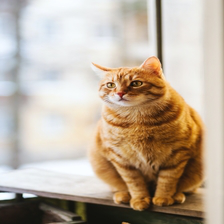

In [ ]:
res('/content/drive/My Drive/ginger_cat.jpg')

Dog


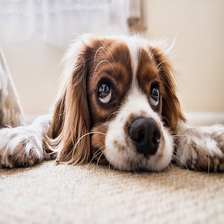

In [ ]:
res('/content/drive/My Drive/dog.jpg')

Cat


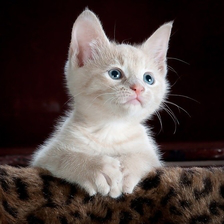

In [ ]:
res('/content/drive/My Drive/white_cat.jpg')

Dog


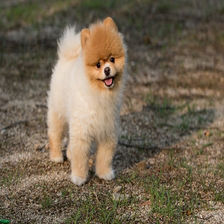

In [ ]:
res('/content/drive/My Drive/сute_doggie.jpg')